#01NAEX project 01

*Add description of your Team*

# Research task:

The goal of this research task is to determine the effect of varying parameters on the frequency (or period) of a pendulum with small-angle approximation (https://en.wikipedia.org/wiki/Pendulum_(mechanics)).


# Description:

You can have the same number of operators as team members. Choose at least three operators to run the experiment, i.e. pendulum swinging and frequency measurement.
You will measure with 3 different  lengths whose levels are 0.5m, 1m, 1.5m and two different weights and two different angles of deflection. Measure the frequency (or period) of the pendulum for each combination. In total, each operator will take 12 measurements.


# Submission:

Submit the elaborated measurement by October 24, 2024 in pdf/ Rmd /ipynb format (Python or R).


# Questions:

## 1.

Measure the data and set up the experiment so that it is *randomized*. Be sure to record the order of the measurements, type of rope, number of weights, and the operator (member of the group taking the measurements) for each measurement. Each operator should conduct one measurement for each combination of rope length and number of weights and angles"


The data were measured as follows: First, we took a rope length of 1.5 meters, a big weight, and measured the frequency with deviations at both angles (10 and 5 degrees). This was done in the order of "Eli, Oksi, and Dan". Then, we shortened the rope to 1 and 0.5 meters and again measured all six values. Afterward, we extended the rope back to 1.5 meters but swapped the weight for a small one and proceeded similarly. In this way, we measured 36 observations. We acknowledge that we followed a specific order when collecting the data, rather than doing it entirely randomly. We did this to save as much time as possible. However, later in this project, we will examine whether the order of observations affected the model's residuals or not.


## 2.

Calculate the basic statistics (mean, median, and sd for each variable). Display the measured data (box plot, interaction plot, effects plot) and comment on what we can predict about the outcome from the given figures before the analysis.


### Imports

In [ ]:
%pip install pingouin
import pingouin as pg

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.anova import anova_lm
import numpy as np
import statsmodels.stats.api as smp
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Basic statistics for the combination of all three variables - length, weight, and angle.

In [ ]:
data = pd.read_excel("Pendulum_data_final.xlsx")

data.columns = data.columns.str.strip()
data = data.rename(columns={"mereni": 'freq',
"uhel": 'angle',
'vaha': 'weight',
'delka': 'length',
'cislo_mereni': 'meas_number'})

statistics = data.groupby(['length', 'weight', 'angle'])['freq'].agg(['mean', 'median', 'std']).reset_index()

statistics


,length,weight,angle,mean,median,std
0,0.5,big,5,5.753333,5.86,0.247857
1,0.5,big,10,5.773333,5.72,0.195533
2,0.5,small,5,5.953333,5.93,0.225906
3,0.5,small,10,5.983333,5.98,0.145029
4,1.0,big,5,8.116667,8.16,0.075056
5,1.0,big,10,8.306667,8.21,0.287460
6,1.0,small,5,8.180000,8.21,0.186815
7,1.0,small,10,8.213333,8.21,0.135031
8,1.5,big,5,9.816667,9.86,0.149778
9,1.5,big,10,9.873333,9.92,0.204042


Boxplots

<Figure size 1200x600 with 0 Axes>

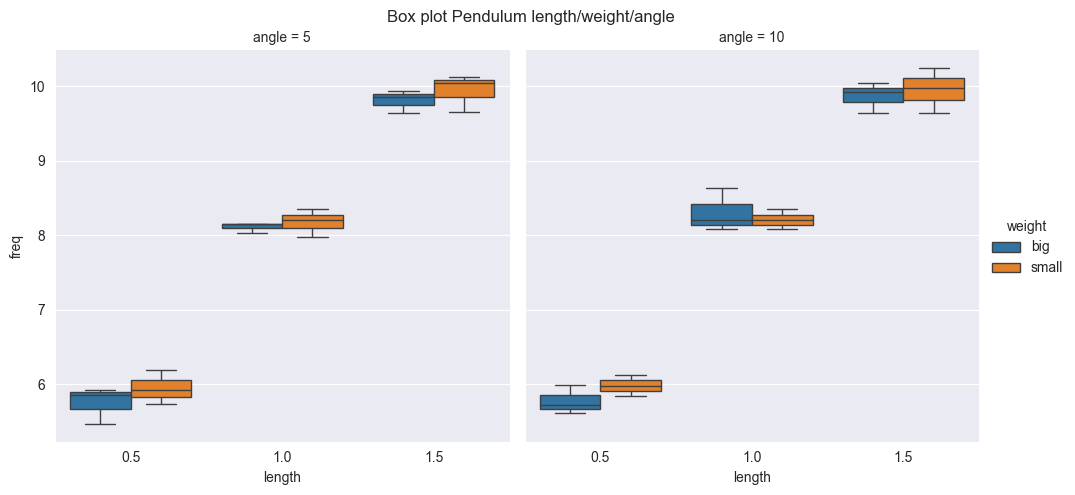

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x='length', y='freq', hue='weight', col='angle', kind='box', data=data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Box plot Pendulum length/weight/angle')
plt.show()

According to the boxplots we can see that the period is increasing with increasing rope length. Differences in weights (big and small) and angles (5 and 10) dont seem to have significant impact.

<Figure size 1200x600 with 0 Axes>

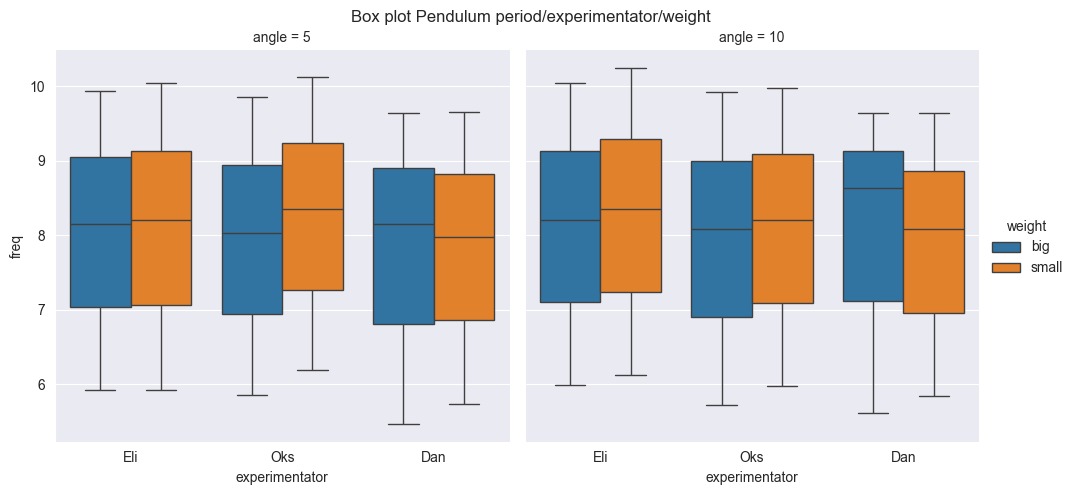

In [ ]:
plt.figure(figsize=(12, 6))
sns.catplot(x='experimentator', y='freq', hue='weight', col='angle', kind='box', data=data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Box plot Pendulum period/experimentator/weight')
plt.show()

Experiment results are consistent among the experimentators.

<Figure size 1000x600 with 0 Axes>

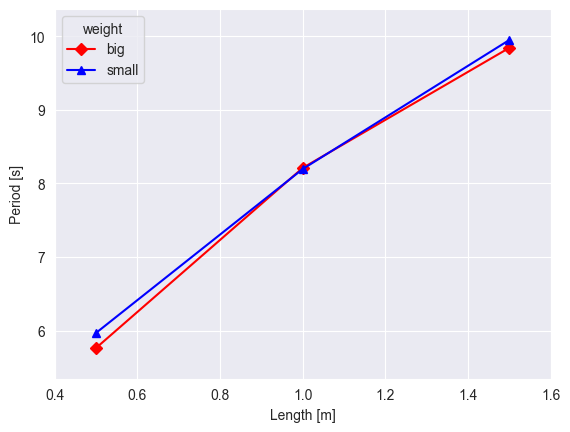

In [ ]:
# Interaction plot - Display of the interaction between pendulum length and weight
plt.figure(figsize=(10, 6))
interaction_plot(data['length'], data['weight'], data['freq'], markers=['D', '^'], colors=['r', 'b'])
plt.xlabel('Length [m]')
plt.ylabel('Period [s]')
plt.show()

<Figure size 1000x600 with 0 Axes>

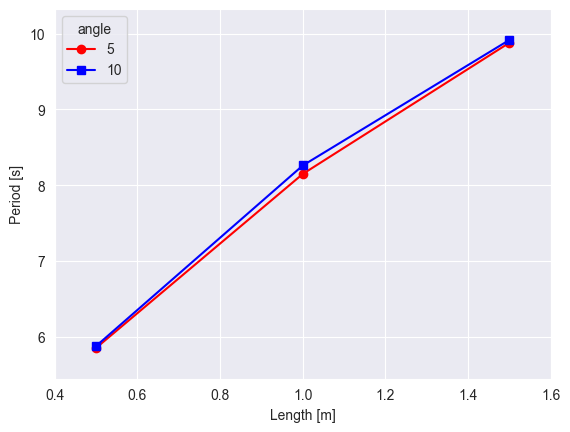

In [ ]:
plt.figure(figsize=(10, 6))
interaction_plot(data['length'], data['angle'], data['freq'], markers=['o', 's'], colors=['r', 'b'])
plt.xlabel('Length [m]')
plt.ylabel('Period [s]')
plt.show()

<Figure size 1200x800 with 0 Axes>

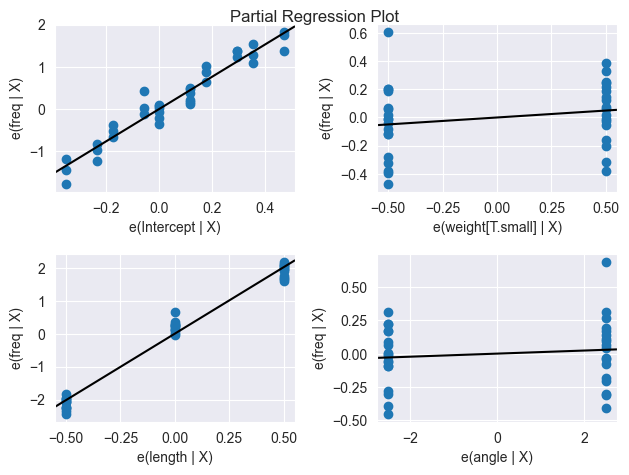

In [ ]:
plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_partregress_grid(sm.OLS.from_formula("freq ~ length + weight + angle", data).fit())
plt.show()


## 3.

Focus especially on the factors length of rope, number of weights, and angles. operator with its own rope type is a nuisance parameter. Run one-way analysis of variance for length. Are there significant differences in means of frequency (or period)? For each factor: perform Tukey HSD and Fisher LSD test for pairwise comparison of means of individual groups.


**One-Way ANOVA** lengths and period

In [ ]:

length_mod = ols('freq ~ C(length)', data=data).fit()
length_anova = anova_lm(length_mod, typ=2)

length_anova

,sum_sq,df,F,PR(>F)
C(length),98.396239,2.0,1266.657259,6.336756e-32
Residual,1.281750,33.0,NaN,NaN


Length difference has an impact on period according to the p-value.

**One-Way ANOVA** weights and period

In [ ]:
weight_mod = ols('freq ~ C(weight)', data=data).fit()
weight_anova = anova_lm(weight_mod, typ=2)

print(weight_anova)

              sum_sq    df         F    PR(>F)
C(weight)   0.088011   1.0  0.030047  0.863412
Residual   99.589978  34.0       NaN       NaN


From the p-value we conclude that the differences in the weights do not affect the measurements, significance level 0.05.


One-Way ANOVA angles and period

In [ ]:
angle_mod = ols('freq ~ C(angle)', data=data).fit()
angle_anova = anova_lm(angle_mod, typ=2)

print(angle_anova)

             sum_sq    df         F    PR(>F)
C(angle)   0.030044   1.0  0.010251  0.919948
Residual  99.647944  34.0       NaN       NaN


Also, differences in the size of the angle do not affect the measurements.


In [ ]:
tukey_weight = pairwise_tukeyhsd(endog=data['freq'], groups=data['weight'], alpha=0.05)
print("\nTukey HSD pro váhy:")
print(tukey_weight)


Tukey HSD pro váhy:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   big  small   0.0989 0.8634 -1.0605 1.2583  False
---------------------------------------------------


In [ ]:
tukey_angle = pairwise_tukeyhsd(endog=data['freq'], groups=data['angle'], alpha=0.05)
print("\nTukey HSD pro úhly:")
print(tukey_angle)


Tukey HSD pro úhly:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     5     10   0.0578 0.9199 -1.1019 1.2175  False
---------------------------------------------------


In [ ]:
tukey_length = pairwise_tukeyhsd(endog=data['freq'], groups=data['length'], alpha=0.05)
print("\nTukey HSD for lengths:")
print(tukey_length)


Tukey HSD for lengths:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.5    1.0   2.3383   0.0 2.1409 2.5358   True
   0.5    1.5   4.0325   0.0 3.8351 4.2299   True
   1.0    1.5   1.6942   0.0 1.4967 1.8916   True
-------------------------------------------------


As we saw on One-way Anova there is significant difference only for lenghts, so we will perform LSD test on this factor only.


In [ ]:
fisherlsd = pg.pairwise_tests(dv='freq', between='length', data=data, parametric=True, padjust='none')
print(fisherlsd)


  Contrast    A    B  Paired  Parametric          T   dof alternative  \
0   length  0.5  1.0   False        True -29.836026  22.0   two-sided   
1   length  0.5  1.5   False        True -47.723278  22.0   two-sided   
2   length  1.0  1.5   False        True -21.623767  22.0   two-sided   

          p-unc       BF10     hedges  
0  2.731301e-19   6.52e+15 -11.760489  
1  1.038405e-23  1.057e+20 -18.811121  
2  2.590893e-16  9.682e+12  -8.523457  


We performed Fisher LSD test on the length factor, comparing three different lengths: 0.5, 1.0, and 1.5.
From T-statistic values and uncorrected pi-values we can conclude that there is signifficant difference betweern every 3 combination of lengths in terms of its impact on period.


## 4.

Analyse the data using ANOVA (take all variables as a factor).

* With the assumption that each of the participants in the experiment forms a block.
* Discuss results, verify assumptions, plot QQ-plot, residuals x fitted values, residuals x factor levels.
* Discuss the effect of the experimental design and the evolution of the residuals over time (order of measurements).
* If the measured data do not meet the assumptions for using ANOVA, discuss possible transformations (logarithmic, Box-Cox, ...) and the reason why the data do not meet the assumptions?


In [ ]:
data.head()

,meas_number,freq,length,weight,angle,experimentator
0,1,10.05,1.5,big,10,Eli
1,2,9.94,1.5,big,5,Eli
2,3,9.92,1.5,big,10,Oks
3,4,9.86,1.5,big,5,Oks
4,5,9.65,1.5,big,10,Dan


First, we converted all variables to categorical. Then, we performed an ANOVA test, where we considered the levels of the variable 'experimenter' as blocks. From the p-values in the ANOVA table, we can see that on the significance level 0.05 the only factor that has a significant effect is the length of the pendulum rope and the different operators, which is consistent with the results obtained in Exercise 3.

In [ ]:
# Convert categorical variables to factors
data['experimentator'] = data['experimentator'].astype('category')
data['angle'] = data['angle'].astype('category')
data['weight'] = data['weight'].astype('category')
data['length'] = data['length'].astype('category')

In [ ]:
# ANOVA model with blocking factor (Experimentator)
model = ols('freq ~ C(experimentator) + C(angle) * C(weight) * C(length)', data=data).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)  # Type 2 ANOVA
print(anova_table)

                                 sum_sq    df            F        PR(>F)
C(experimentator)              0.418022   2.0     7.186504  3.963494e-03
C(angle)                       0.030044   1.0     1.033029  3.204964e-01
C(weight)                      0.088011   1.0     3.026117  9.590789e-02
C(length)                     98.396239   2.0  1691.596508  8.186352e-25
C(angle):C(weight)             0.008711   1.0     0.299517  5.896946e-01
C(angle):C(length)             0.013272   2.0     0.228172  7.978477e-01
C(weight):C(length)            0.072872   2.0     1.252796  3.053039e-01
C(angle):C(weight):C(length)   0.010972   2.0     0.188631  8.294173e-01
Residual                       0.639844  22.0          NaN           NaN


From the QQ-plot, we see that the residuals align quite well with the 45-degree line, so we can conclude that the assumption of normality is not violated. From the residual plots, we do not observe any obvious trends, so we can also conclude that the assumptions of homoscedasticity and independence in the data have not been violated.

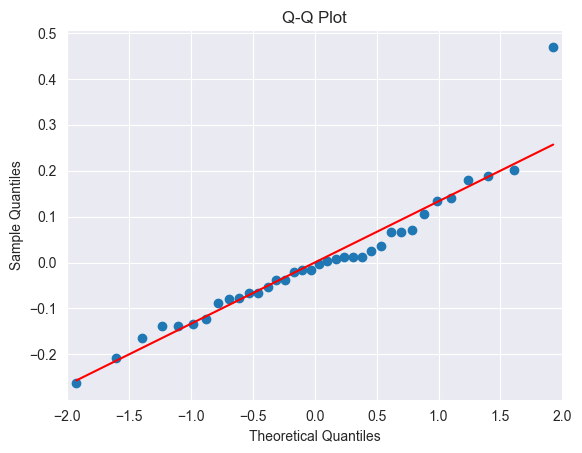

In [ ]:
# Extract residuals and fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# --- 1. Q-Q Plot for Normality of Residuals ---
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

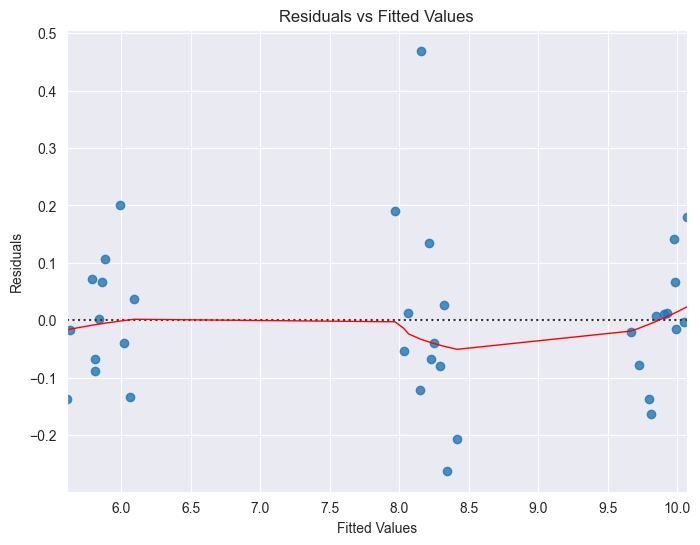

In [ ]:
# --- 2. Residuals vs Fitted Values (Homoscedasticity) ---
plt.figure(figsize=(8, 6))
sns.residplot(x=fitted_values, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()


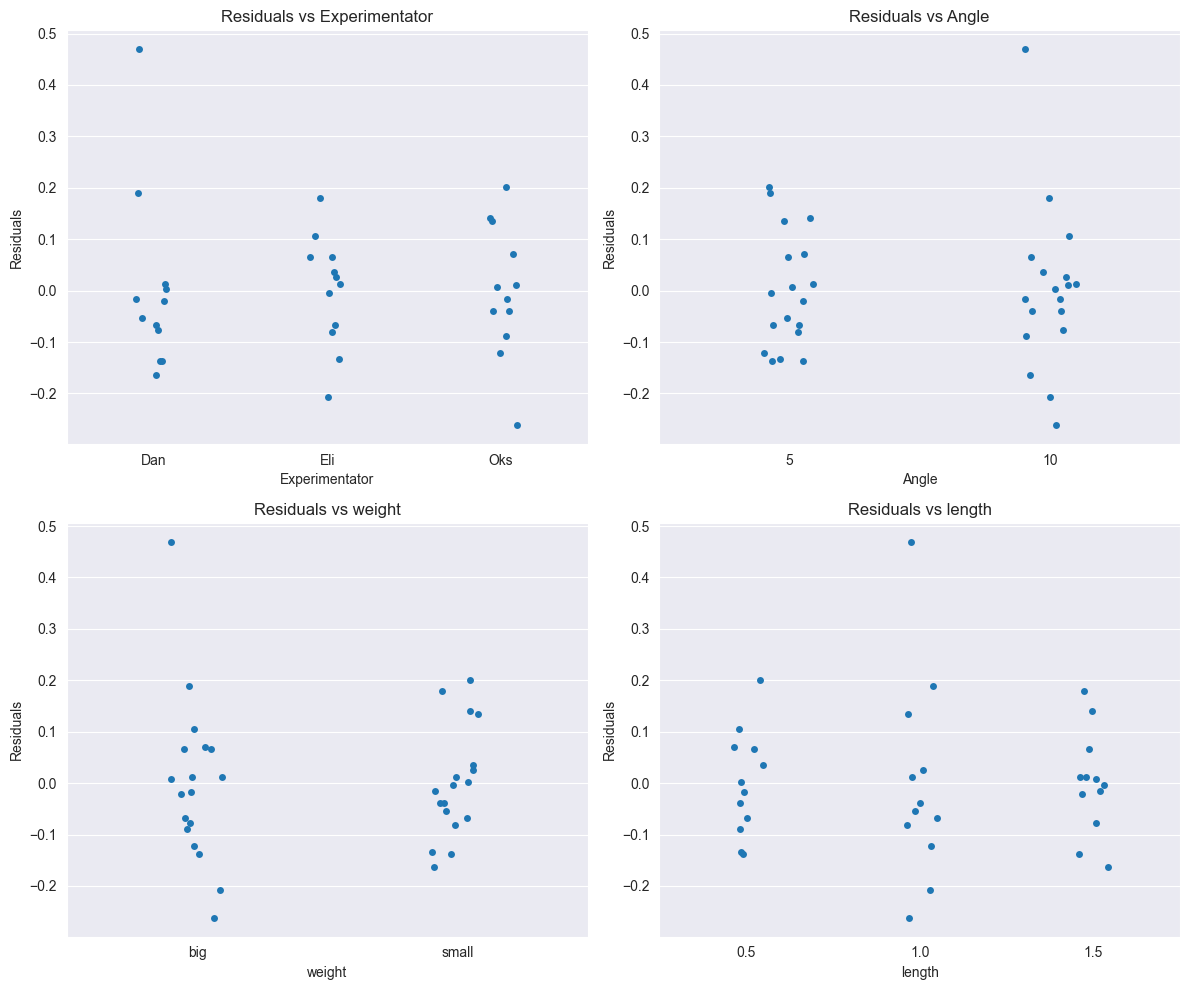

In [ ]:
# --- 3. Residuals vs Factor Levels ---
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# --- Residuals vs Experimentator ---
sns.stripplot(x='experimentator', y=residuals, data=data, jitter=True, ax=axs[0, 0])
axs[0, 0].set_title('Residuals vs Experimentator')
axs[0, 0].set_xlabel('Experimentator')
axs[0, 0].set_ylabel('Residuals')

# --- Residuals vs angle ---
sns.stripplot(x='angle', y=residuals, data=data, jitter=True, ax=axs[0, 1])
axs[0, 1].set_title('Residuals vs Angle')
axs[0, 1].set_xlabel('Angle')
axs[0, 1].set_ylabel('Residuals')

# --- Residuals vs weight ---
sns.stripplot(x='weight', y=residuals, data=data, jitter=True, ax=axs[1, 0])
axs[1, 0].set_title('Residuals vs weight')
axs[1, 0].set_xlabel('weight')
axs[1, 0].set_ylabel('Residuals')

# --- Residuals vs length ---
sns.stripplot(x='length', y=residuals, data=data, jitter=True, ax=axs[1, 1])
axs[1, 1].set_title('Residuals vs length')
axs[1, 1].set_xlabel('length')
axs[1, 1].set_ylabel('Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

If we plot the evolution of the residuals over time, we can see that the residual seem to oscillate around zero without any clear pattern. Therefore this plot is suggesting that the order in which the measurements were taken doesn't significantly affect the residuals.

Based on the diagnostic plots, the assumptions seem to not be violated, thus a transformation is not necessary.

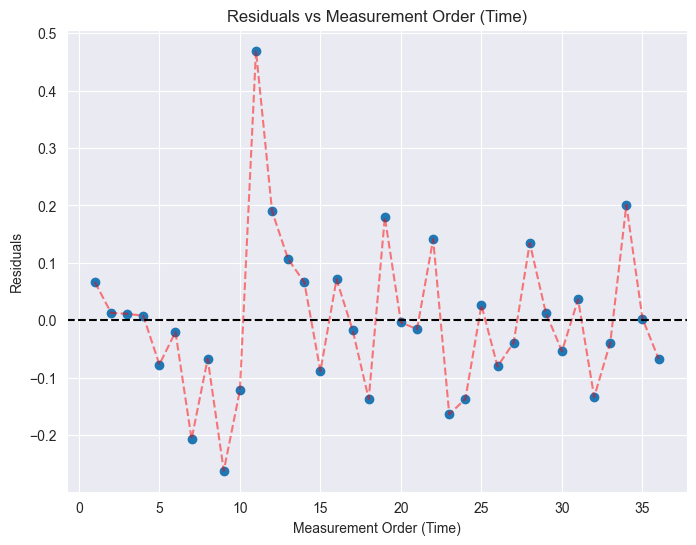

In [ ]:
# Plot residuals over the order of measurements
plt.figure(figsize=(8, 6))
plt.scatter(data['meas_number'], residuals)
plt.plot(data['meas_number'], residuals, color='red', linestyle='--', alpha=0.5)
plt.title('Residuals vs Measurement Order (Time)')
plt.xlabel('Measurement Order (Time)')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.show()


## 5.

Choose one level of weights factor and *even if it does not meet the assumptions for using ANOVA*, solve the following:
* Calculate the power of the test in the ANOVA for 3 different lenghts of ropes and **n** operators.
* Assume the standard deviation of the disturbances to be a certain value for the experiment conducted
 and the maximum (for us significant) difference we want to detect is 0.1s.
 Calculate the number of operators needed for the power of the resulting test to be greater than 0.9.


- Calculate the power of test for different rope lengths, each time with the data filtered by current rope length. Regardless of whether the ANOVA assumptions are met, calculate the number of operators desired to reach the power of 0.9

In [ ]:
const = {"weight_lv": 'big',
        "eff_size": 0.1 / data['freq'].std(),
        "noper": data['experimentator'].nunique(), 'desired_power': 0.9}
pow = {}            # Dict to store power for each length.
desi_noper = {}     # Dict to store desired number of operators to reach the power of 0.9 for each length

for l in data['length'].unique():
    data_l = data[data['length'] == l]
    pow[l] = smp.tt_solve_power(effect_size=const["eff_size"], nobs=len(data_l), alpha=0.05,alternative='two-sided')
    desi_noper[l] = smp.tt_solve_power(effect_size=const["eff_size"], alpha=0.05, power=const['desired_power'], alternative='two-sided')

pow, desi_noper

({1.5: np.float64(0.05405918088850059),
  1.0: np.float64(0.05405918088850059),
  0.5: np.float64(0.05405918088850059)},
 {1.5: 2994.374142070895, 1.0: 2994.374142070895, 0.5: 2994.374142070895})


- Even though we would not mind the unmet assumptions, check them (just to be sure)

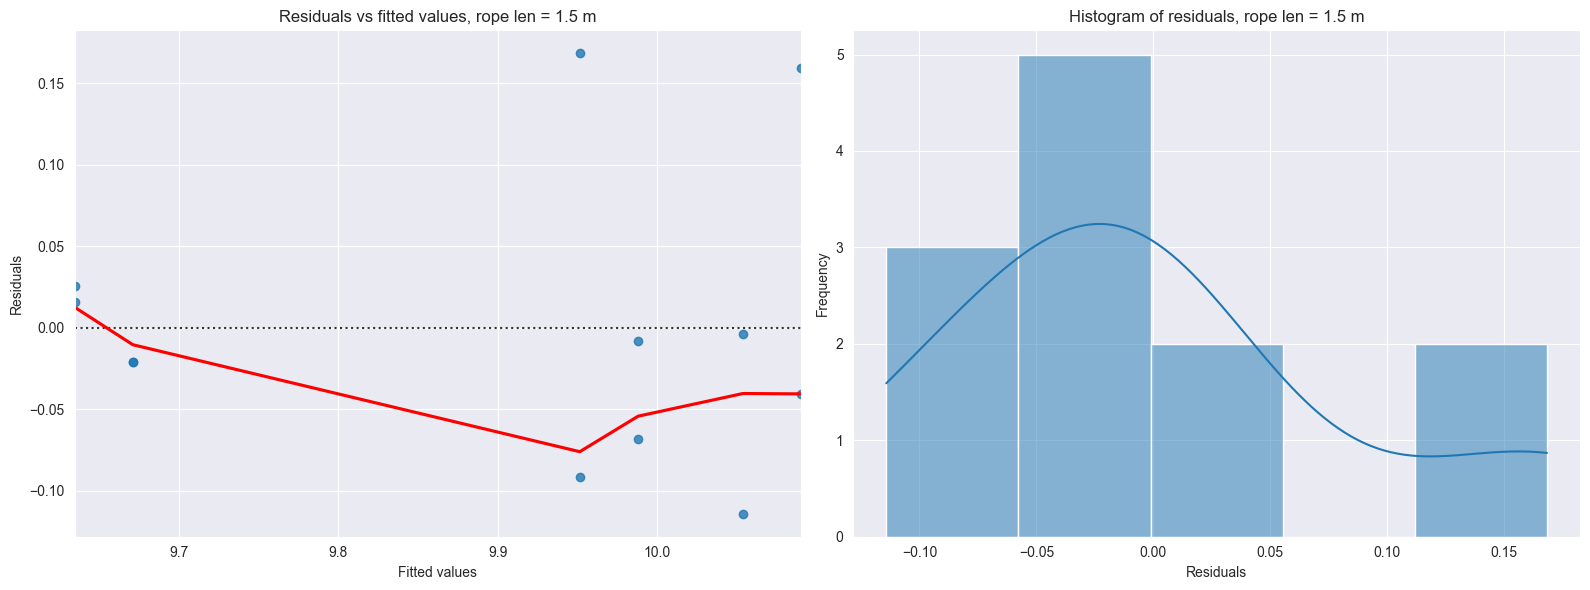

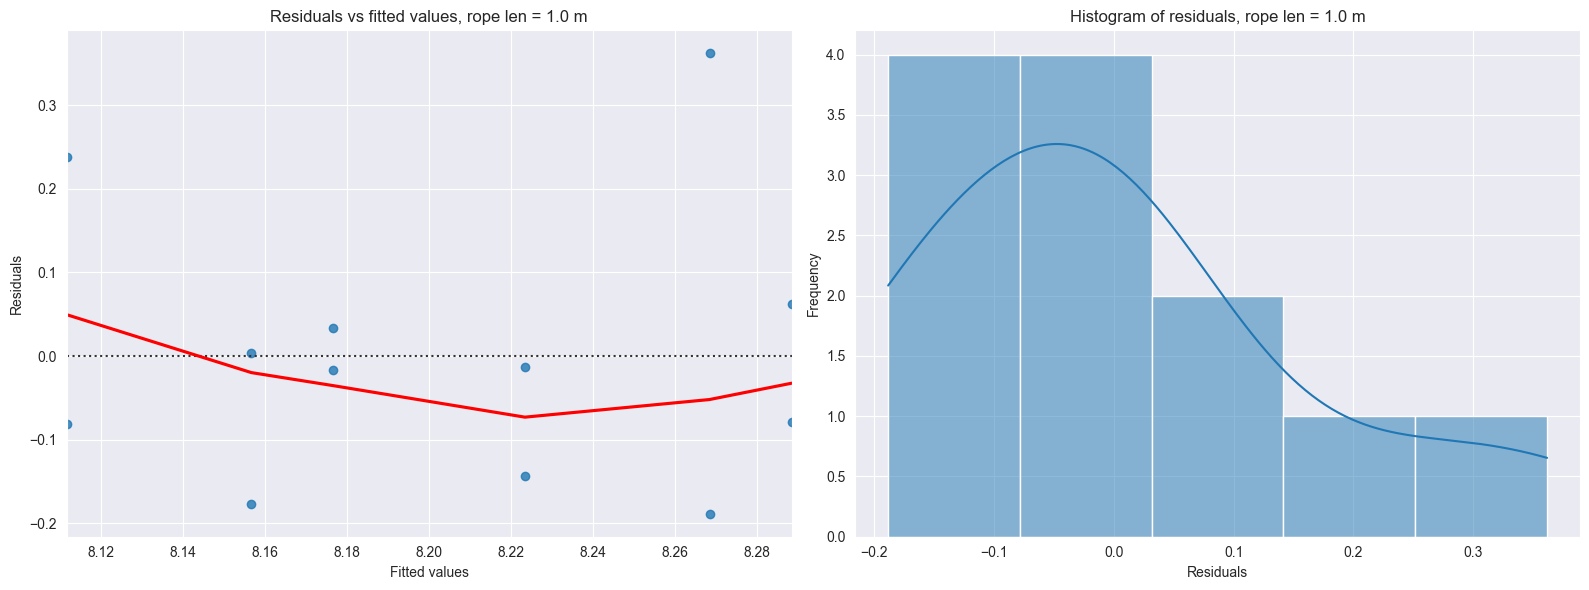

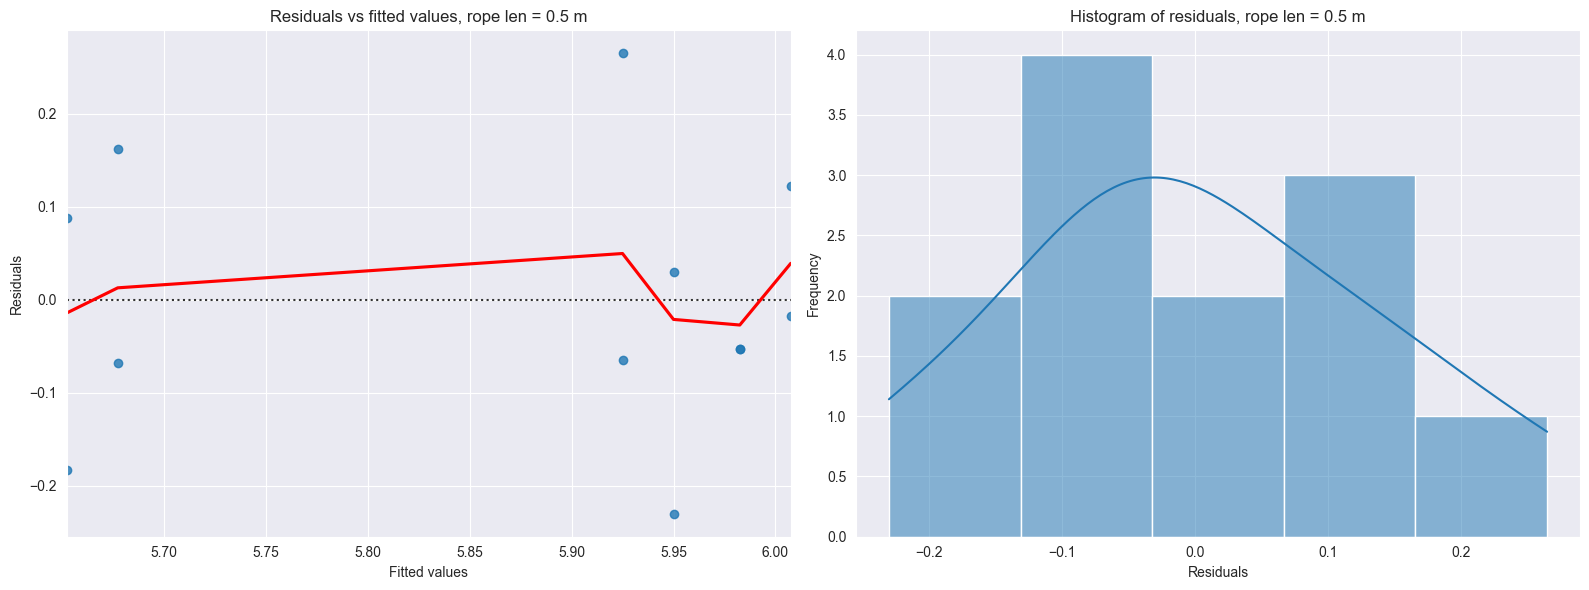

({1.5: ShapiroResult(statistic=np.float64(0.8819853177760428), pvalue=np.float64(0.0929365870343527)),
  1.0: ShapiroResult(statistic=np.float64(0.8985098620628894), pvalue=np.float64(0.15174722964131304)),
  0.5: ShapiroResult(statistic=np.float64(0.9708119146401244), pvalue=np.float64(0.9191212539139668))},
 {1.5: {'stat': np.float64(2.97587061466776),
   'p-value': np.float64(0.7037060520569006)},
  1.0: {'stat': np.float64(3.9524380302910167),
   'p-value': np.float64(0.5562838809480015)},
  0.5: {'stat': np.float64(3.0591918317358298),
   'p-value': np.float64(0.6908604992059174)}})

In [ ]:
# Check the assumptions for conducted ANOVA

shapiro_results = {}
bp_results = {}

for l in data['length'].unique():
    data_l = data[data['length'] == l]
    model_l = ols('freq ~ C(length) + C(angle) + C(experimentator)', data=data_l).fit()
    shapiro_results[l] = stats.shapiro(model_l.resid)   # Normality
    bp_results[l] = {'stat': het_breuschpagan(model_l.resid, model_l.model.exog)[0], 'p-value': het_breuschpagan(model_l.resid, model_l.model.exog)[1]}  # Homoscedasticity

    fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

    # Residuals vs fitted values
    sns.residplot(x=model_l.fittedvalues, y=model_l.resid, lowess=True, line_kws={'color': 'red'}, ax=axes[0])
    axes[0].set_title(f'Residuals vs fitted values, rope len = {l} m')
    axes[0].set_xlabel('Fitted values')
    axes[0].set_ylabel('Residuals')

    # Residual histograms
    sns.histplot(model_l.resid, kde=True, ax=axes[1])
    axes[1].set_title(f'Histogram of residuals, rope len = {l} m')
    axes[1].set_xlabel('Residuals')
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

shapiro_results, bp_results


Seem fine!

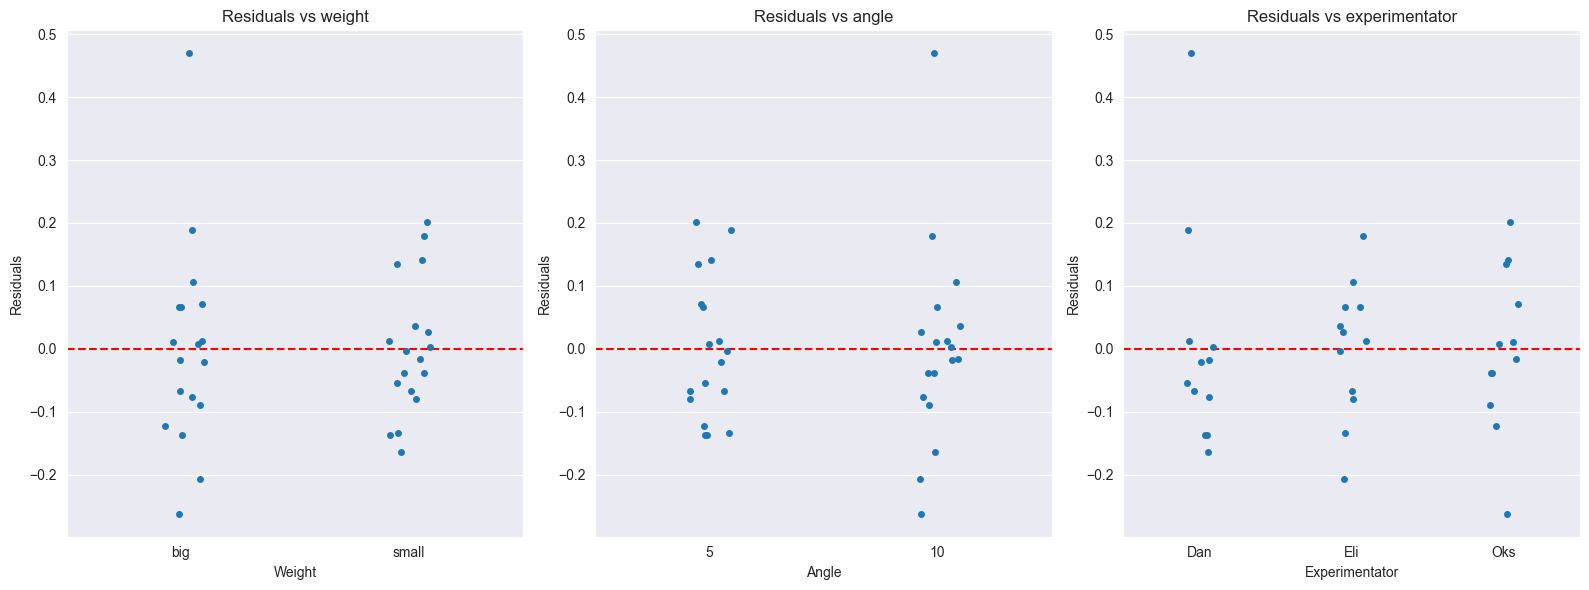

In [ ]:
# Residuals vs weight, angle, and experimentator
fig, axes = plt.subplots(1, 3, figsize=(16, 6), dpi=100)

sns.stripplot(x='weight', y=model.resid, data=data, jitter=True, ax=axes[0])
axes[0].set_title('Residuals vs weight')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Residuals')
axes[0].axhline(0, color='red', linestyle='--')

sns.stripplot(x='angle', y=model.resid, data=data, jitter=True, ax=axes[1])
axes[1].set_title('Residuals vs angle')
axes[1].set_xlabel('Angle')
axes[1].set_ylabel('Residuals')
axes[1].axhline(0, color='red', linestyle='--')

sns.stripplot(x='experimentator', y=model.resid, data=data, jitter=True, ax=axes[2])
axes[2].set_title('Residuals vs experimentator')
axes[2].set_xlabel('Experimentator')
axes[2].set_ylabel('Residuals')
axes[2].axhline(0, color='red', linestyle='--')

plt.tight_layout()
plt.show()


## 6.

Create a regression model where you do not consider blocks and both length of the rope and angles are quantitative variables.
  * Try to add a squared variable to the model and compare the two regression models with each other and select the more appropriate one.
  * Check the assumptions for using the chosen model.


In [ ]:
print("Current columns in DataFrame:", data.columns.tolist())

Current columns in DataFrame: ['meas_number', 'freq', 'length', 'weight', 'angle', 'experimentator']


In [ ]:
# Convert 'weight' to a categorical variable
data['weight'] = data['weight'].astype('category')
data['length'] = data['length'].astype('float')

# Add the squared term of 'length' to the DataFrame (optional)
# data['length_squared'] = data['length'] ** 2

# Fit the original regression model
model1 = ols('freq ~ length + angle + weight', data=data).fit()

# Fit the new regression model with the squared term
model2 = ols('freq ~ length + I(length ** 2) + angle + weight', data=data).fit()

# Print the regression results
print("Original Model:")
print(model1.summary())

print("\nModel with Squared Term:")
print(model2.summary())

# Compare models using AIC and BIC
print("\nModel Comparison:")
print(f"Original Model AIC: {model1.aic:.2f}, BIC: {model1.bic:.2f}")
print(f"Model with Squared Term AIC: {model2.aic:.2f}, BIC: {model2.bic:.2f}")

# Perform an F-test to compare the models
anova_results = anova_lm(model1, model2)
print("\nANOVA Results:")
print(anova_results)

Original Model:
                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     522.7
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.00e-27
Time:                        19:22:39   Log-Likelihood:                 1.0026
No. Observations:                  36   AIC:                             5.995
Df Residuals:                      32   BIC:                             12.33
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.8786

We created three models with linear and quadratic dependencyand we will compare them.

In [ ]:
model3 = ols('freq ~ np.sqrt(length) + angle + weight', data=data).fit()

print("\nModel with Square Root of 'length':")
print(model3.summary())


Model with Square Root of 'length':
                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     883.4
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.74e-31
Time:                        19:22:43   Log-Likelihood:                 10.302
No. Observations:                  36   AIC:                            -12.60
Df Residuals:                      32   BIC:                            -6.271
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Inter

For illustration, we can go back to 02VOAF and also make a "physics" model.

Now we will switch to the analysis of residuals.

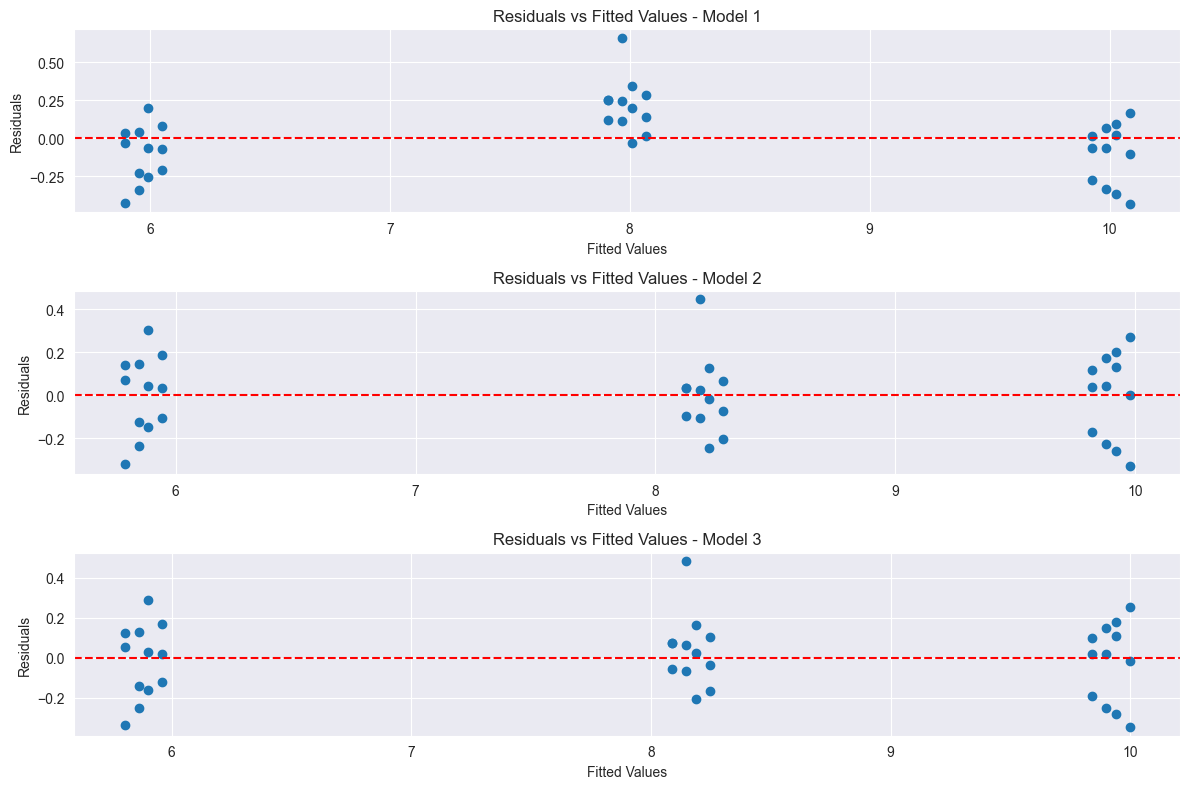

In [ ]:
# Obtain residuals for each model
residuals1 = model1.resid
residuals2 = model2.resid
residuals3 = model3.resid

# Add residuals to the DataFrame for inspection
data['residuals_model1'] = residuals1
data['residuals_model2'] = residuals2
data['residuals_model3'] = residuals3

# Plot residuals vs fitted values
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.scatter(model1.fittedvalues, residuals1)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values - Model 1')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(3, 1, 2)
plt.scatter(model2.fittedvalues, residuals2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values - Model 2')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.subplot(3, 1, 3)
plt.scatter(model3.fittedvalues, residuals3)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted Values - Model 3')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

All of the plots look OK, we can clearly see the distribution of residuals around line and one outlier.

Now we will go through conditions to use linear regression, we start with linearity.

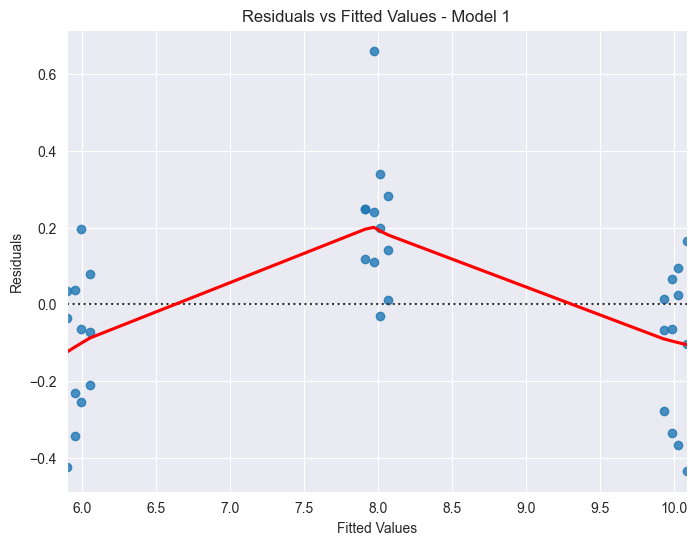

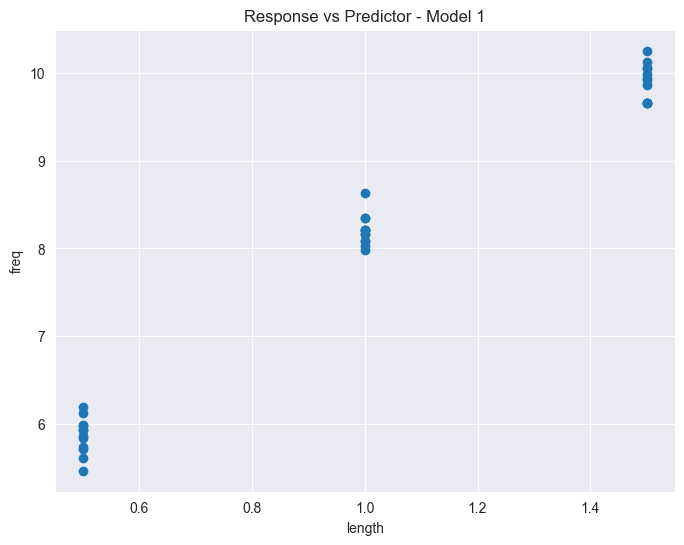

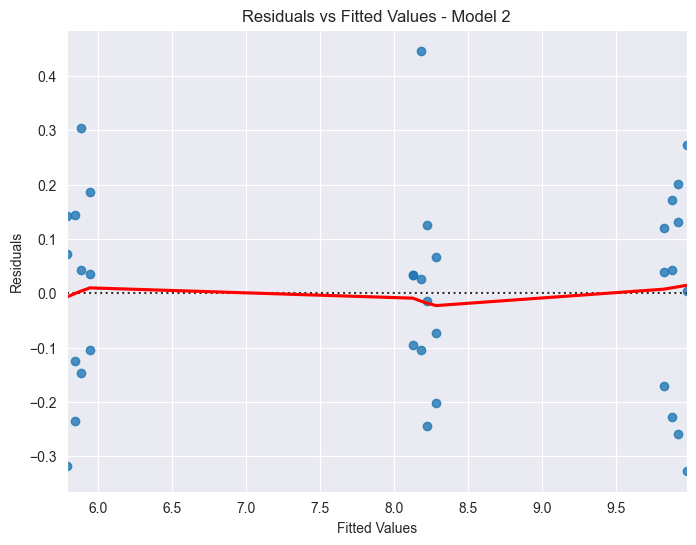

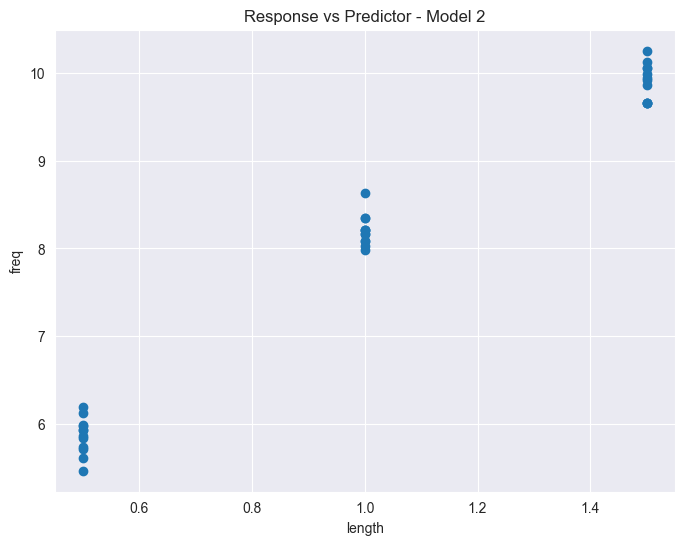

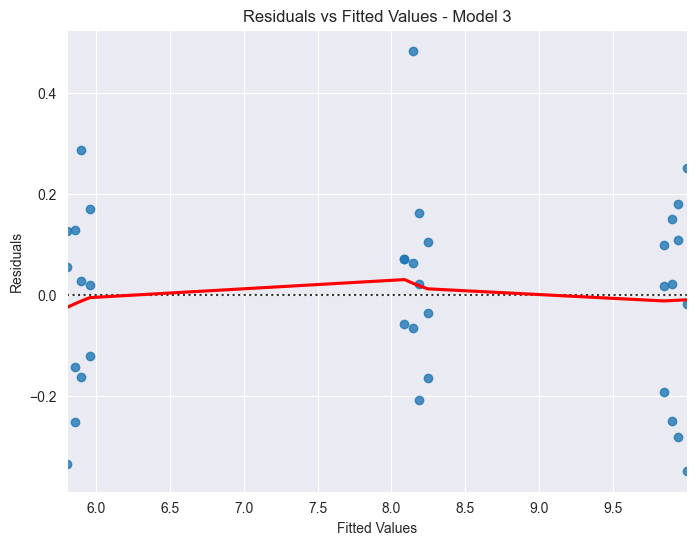

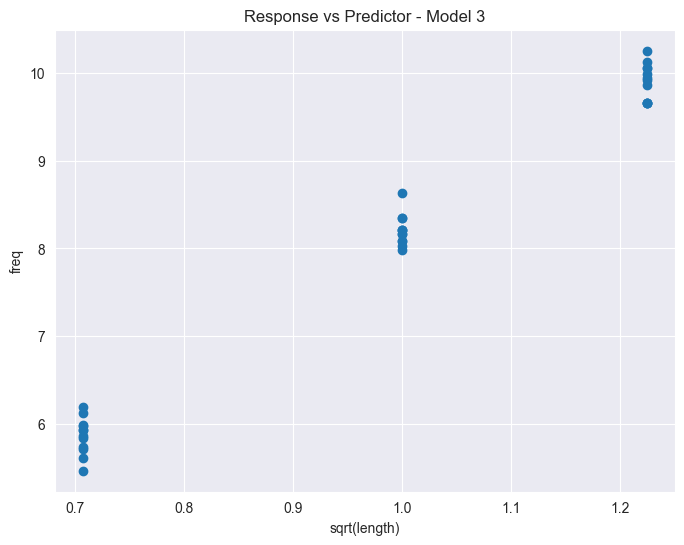

In [ ]:
models = {'Model 1': model1, 'Model 2': model2, 'Model 3': model3}

for name, model in models.items():
    # Residuals vs Fitted Values
    plt.figure(figsize=(8, 6))
    sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
    plt.title(f'Residuals vs Fitted Values - {name}')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Scatter plot of Response vs. Main Predictor
    plt.figure(figsize=(8, 6))
    if name == 'Model 1':
        plt.scatter(data['length'], data['freq'])
        plt.xlabel('length')
    elif name == 'Model 2':
        plt.scatter(data['length'], data['freq'])
        plt.xlabel('length')
    elif name == 'Model 3':
        plt.scatter(np.sqrt(data['length']), data['freq'])
        plt.xlabel('sqrt(length)')
    plt.ylabel('freq')
    plt.title(f'Response vs Predictor - {name}')
    plt.show()

Model 1 has a visible problem with linearity. 2 and three are working perfectly.

Now we continue with independence

In [ ]:
for name, model in models.items():
    dw_stat = durbin_watson(model.resid)
    print(f'{name} - Durbin-Watson statistic: {dw_stat:.3f}')

Model 1 - Durbin-Watson statistic: 1.330
Model 2 - Durbin-Watson statistic: 1.932
Model 3 - Durbin-Watson statistic: 1.899


All models are working good.

Now continue with Homoscedascity

In [ ]:
for name, model in models.items():
    # Residuals vs. Fitted Values (already plotted)

    # Breusch-Pagan test
    bp_test = smp.het_breuschpagan(model.resid, model.model.exog)
    bp_stat = bp_test[0]
    bp_pvalue = bp_test[1]

    print(f'{name} - Breusch-Pagan test statistic: {bp_stat:.3f}, p-value: {bp_pvalue:.3f}')

Model 1 - Breusch-Pagan test statistic: 1.296, p-value: 0.730
Model 2 - Breusch-Pagan test statistic: 0.653, p-value: 0.957
Model 3 - Breusch-Pagan test statistic: 0.615, p-value: 0.893


Everything works just fine

Now we verify normality of residuals.

In [ ]:
for name, model in models.items():
    # Residuals vs. Fitted Values (already plotted)

    # Breusch-Pagan test
    bp_test = smp.het_breuschpagan(model.resid, model.model.exog)
    bp_stat = bp_test[0]
    bp_pvalue = bp_test[1]

    print(f'{name} - Breusch-Pagan test statistic: {bp_stat:.3f}, p-value: {bp_pvalue:.3f}')

Model 1 - Breusch-Pagan test statistic: 1.296, p-value: 0.730
Model 2 - Breusch-Pagan test statistic: 0.653, p-value: 0.957
Model 3 - Breusch-Pagan test statistic: 0.615, p-value: 0.893


The histograms do not exactly normal, but QQ-plots look good so because we have a lot of observations we can just use central limit theorem and say we can use residuals as normal.

Last, but not least, we verify multicolinearity

In [ ]:
for name, model in models.items():
    # Prepare the exogenous variables (excluding the intercept)
    exog_vars = model.model.exog
    exog_names = model.model.exog_names
    # Remove intercept term if present
    if 'Intercept' in exog_names:
        exog_vars = exog_vars[:, 1:]
        exog_names = exog_names[1:]

    vif_data = pd.DataFrame()
    vif_data['feature'] = exog_names
    vif_data['VIF'] = [variance_inflation_factor(exog_vars, i) for i in range(exog_vars.shape[1])]

    print(f'\n{name} - Variance Inflation Factors:')
    print(vif_data)


Model 1 - Variance Inflation Factors:
           feature       VIF
0      angle[T.10]  1.777778
1  weight[T.small]  1.777778
2           length  2.333333

Model 2 - Variance Inflation Factors:
           feature        VIF
0      angle[T.10]   1.966102
1  weight[T.small]   1.966102
2           length  29.067797
3   I(length ** 2)  22.423729

Model 3 - Variance Inflation Factors:
           feature       VIF
0      angle[T.10]  1.917572
1  weight[T.small]  1.917572
2  np.sqrt(length)  2.752717


Model 2 has a huge VIF factor because it contains two variables in different power. But interseting is a big VIF within Model 3, actually even for Model 1 VIF variable is pretty high, that could happend due the uhel variable being unimportant in the model.

Influential observations and outliers.

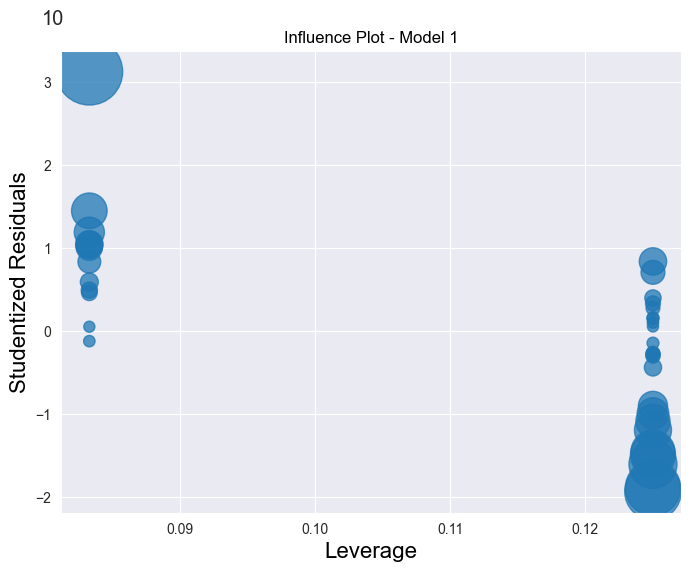

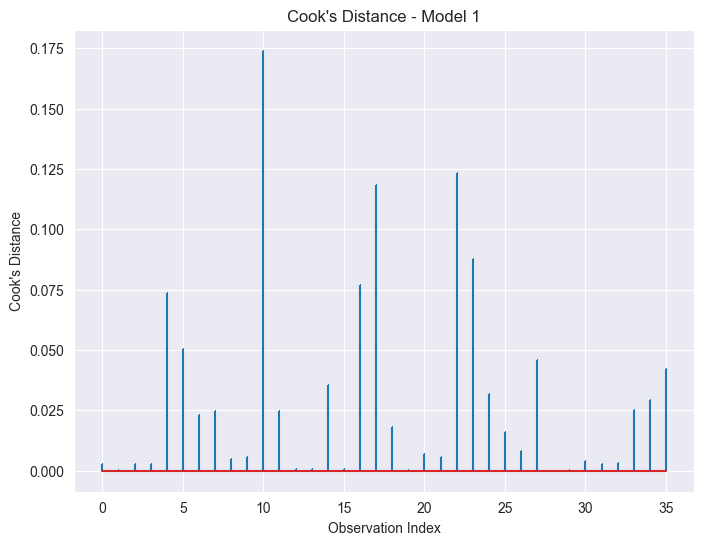

Model 1 - Influential points (Cook's Distance > 0.111): [10 17 22]


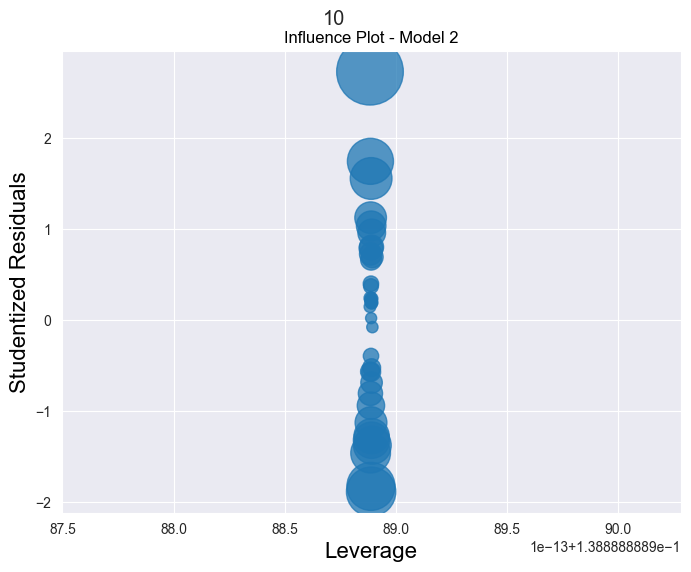

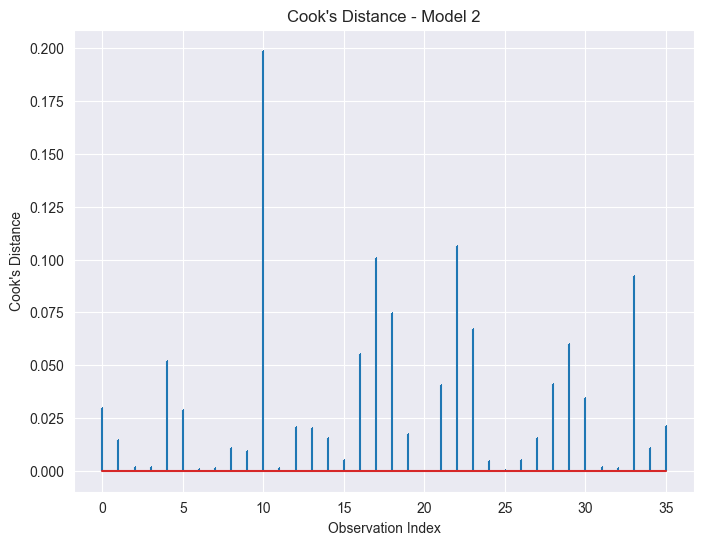

Model 2 - Influential points (Cook's Distance > 0.111): [10]


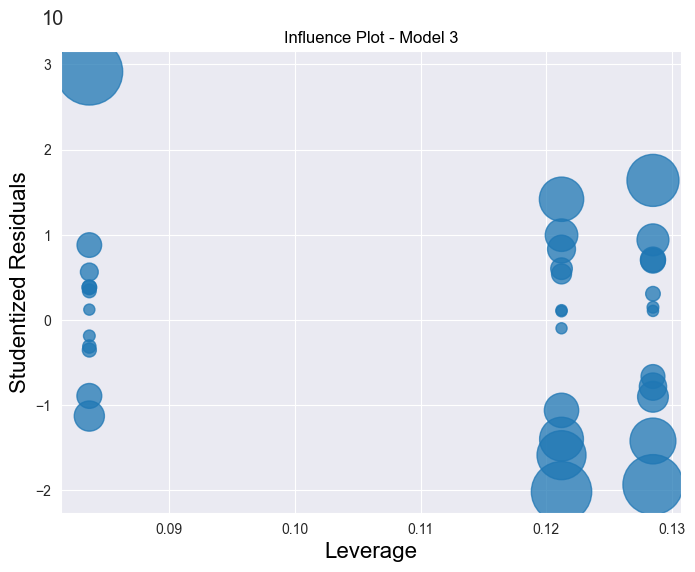

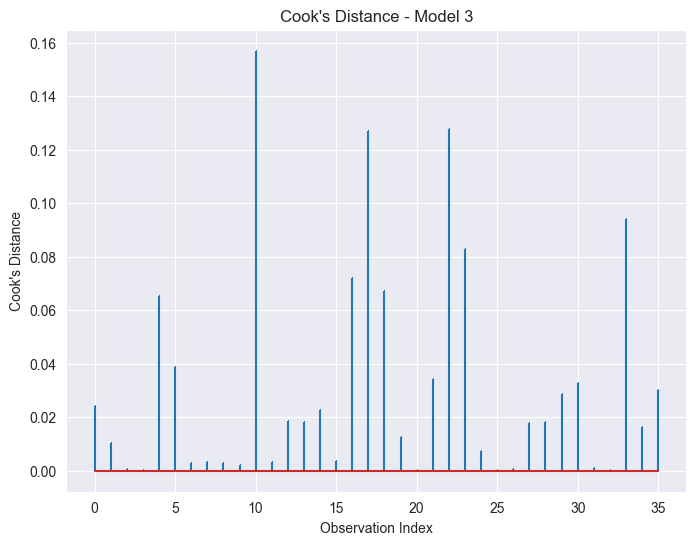

Model 3 - Influential points (Cook's Distance > 0.111): [10 17 22]


In [ ]:
for name, model in models.items():
    # Influence plot
    fig, ax = plt.subplots(figsize=(8, 6))
    influence_plot(model, ax=ax, criterion="cooks")
    plt.title(f'Influence Plot - {name}')
    plt.show()

    # Cook's Distance
    influence = model.get_influence()
    (c, p) = influence.cooks_distance

    # Plot Cook's Distance
    plt.figure(figsize=(8, 6))
    plt.stem(np.arange(len(c)), c, markerfmt=",")
    plt.title(f"Cook's Distance - {name}")
    plt.xlabel('Observation Index')
    plt.ylabel("Cook's Distance")
    plt.show()

    # Identify points with high Cook's Distance
    threshold = 4 / len(data)
    influential_points = np.where(c > threshold)[0]
    print(f"{name} - Influential points (Cook's Distance > {threshold:.3f}): {influential_points}")

Cooks distances are not extreme, so we can pass.

Let's get back to our model and let us focus on hidden multicolinearity through the experimentators.

In [ ]:
data['weight'] = data['weight'].astype('category')
data['experimentator'] = data['experimentator'].astype('category')

# Fit the updated models
model1_exp = ols('freq ~ length + angle + weight + experimentator', data=data).fit()
model2_exp = ols('freq ~ length + I(length ** 2) + angle + weight + experimentator', data=data).fit()
model3_exp = ols('freq ~ np.sqrt(length) + angle + weight + experimentator', data=data).fit()

print(model1_exp.summary())
print(model2_exp.summary())
print(model3_exp.summary())

                            OLS Regression Results                            
Dep. Variable:                   freq   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     373.6
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.63e-26
Time:                        19:24:10   Log-Likelihood:                 5.2384
No. Observations:                  36   AIC:                             1.523
Df Residuals:                      30   BIC:                             11.02
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.73

We can see the problem, that the experimetator (Oksana) is statistically significant variable, but not extremely, it is very close for being statistically insignificant. The reason that Eli is insignificant may be due to Daniel (whose we take as a standard) had propably shorter times, Oksana longer times and Eli was in between.

Finally, we can check the periodicity.

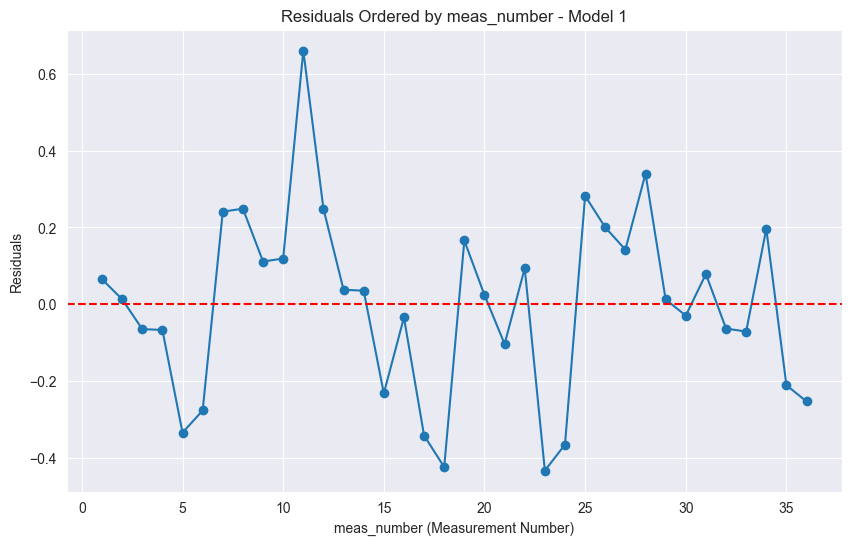

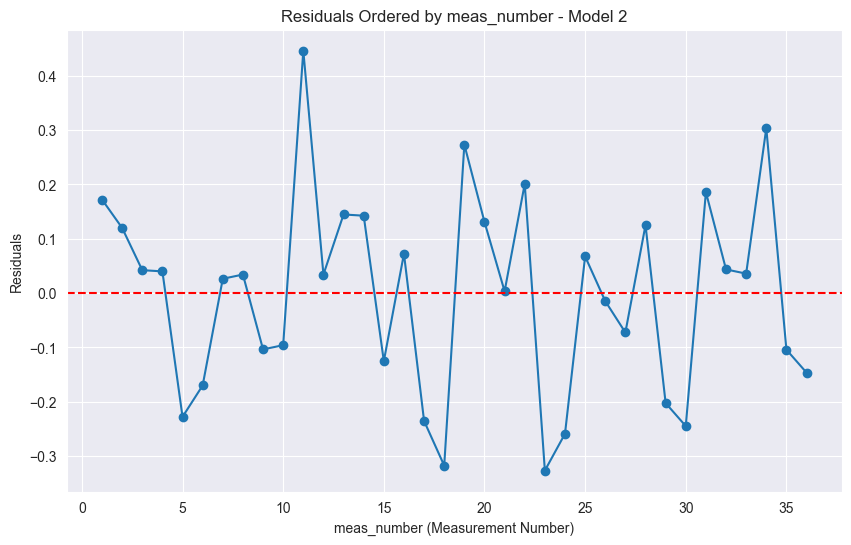

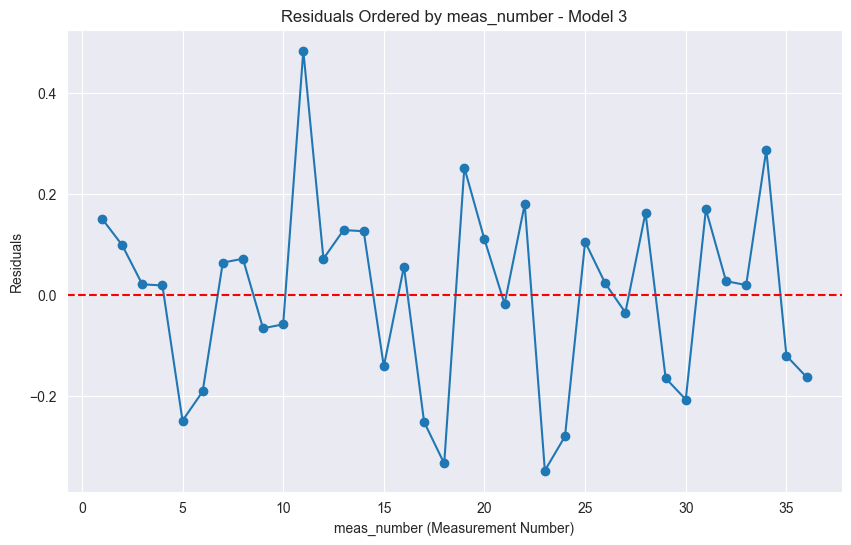

In [ ]:
# List of models and their names
models = {
    'Model 1': model1,
    'Model 2': model2,
    'Model 3': model3
}

# Loop through each model to extract, sort, and plot residuals
for name, model in models.items():
    # Extract residuals
    residuals = model.resid

    # Create a DataFrame with 'meas_number' and residuals
    residuals_df = pd.DataFrame({
        'meas_number': data['meas_number'],
        'Residuals': residuals
    })

    # Sort the DataFrame by 'meas_number'
    residuals_df_sorted = residuals_df.sort_values(by='meas_number')

    # Plot the residuals
    plt.figure(figsize=(10, 6))
    plt.plot(residuals_df_sorted['meas_number'], residuals_df_sorted['Residuals'], marker='o', linestyle='-')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f'Residuals Ordered by meas_number - {name}')
    plt.xlabel('meas_number (Measurement Number)')
    plt.ylabel('Residuals')
    plt.grid(True)
    plt.show()

We can see a clear pattern where nearly every 5th and 6th observation (done by Daniel) was far quicker and we can colectively pray for his girlfriend.


## 7.: Conclusions

If you based your previous answers on the p-value, discuss following.  Does p-value provide a good measure of evidence regarding a model or hypothesis?

For example, in examples 3 and 4, we see that only the difference in string lengths appears to be significant, which we concluded based on the p-values. However, we had assumed this from the beginning when looking at the boxplots. Therefore, we conclude that yes, the p-value provides a good measure of evidence.


Note: In case the blocks are highly dominant and none of the other variables appear significant,
      use only the "operator with the best data for academic purposes" for the resulting analysis.